### In this notebook we are going to implement the exercises as part of the lecture on Regression.

In [15]:
# Import libraries
import numpy as np 
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Exercises

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per \$10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - \% lower status of the population

[LABEL TO PREDICT] MEDV - Median value of owner-occupied homes in $1000's

In [16]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 
                'MEDV']
data = pd.read_csv('boston_house.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(10))

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396

### Exploratory Analysis

Visualise your housing data using scatter plots.

In [17]:
data_features = data.drop(columns=['MEDV'])
label_to_predict = data['MEDV']

### <font color='green'>Visualise the RM - average number of rooms per dwelling (X-axis) against AGE - proportion of owner-occupied units built prior to 1940 (Y-axis).</font>




Text(0.5,1,'Graph of RM against AGE')

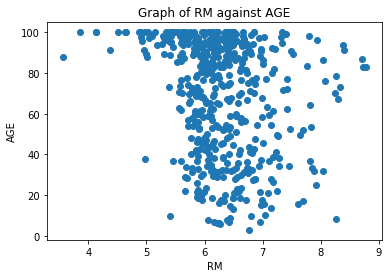

In [18]:
# Visualise data, colour scatterpoints using labels
plt.scatter(x=data_features['RM'], y=data_features['AGE'])

# Set labels for x axis, y axis and plot title
plt.xlabel('RM')
plt.ylabel('AGE')
plt.title('Graph of RM against AGE')

### Data Split

3. Split the dataset into training and testing sets. Choose the ratio.

In [7]:
X = data_features # X is the features we want to input into the model
y = label_to_predict # y is the value that we want to predict

### <font color='green'>FILL IN TEST SIZE PARAMETER BELOW (range from 0 to 1, where 1 represents 100%)</font>

TASK: Define a value for the variable test_size.

In [8]:
test_size = 0.2 

Remember that we need training, testing and validation datasets. 

Training to train our model, 

validation to tune our parameters, and 

testing to see how well our model performances on unseen data!

In [19]:
# Split data into train and test sets with 20% for testing, and 80% for training

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Get a small validation set to choose a parameter to maximise performance
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=test_size, random_state=42)


### <font color='green'>Scale your data features in the cell below.</font>

Set your scaled features to the same variable name: e.g. X_train = <font color='red'>SCALER.</font>.fit_transform(X_train)

In [20]:
# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

# Linear Regression

### Model Training

### <font color='green'>Implement a linear regression on the training set. Test the model on the test set.</font>

TASK 1: Fit a linear regression on the training set.

TASK 2: Use the fitted model to predict values for the test set.

In [11]:
# Fit training data on LR
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

print(LR_model.score(X_test, y_test))

0.6050024218648127


### <font color='green'>Visualise the weights of your model. Which feature increases the house price the most? Which feature decreases the house price the most?</font>

TASK: Visualise the weights of your model using a plt.barh plot. 

Hint: The model weights can be found as <font color='red'>my_trained_model</font>.coef_

Text(0.5,0,'Feature Importance')

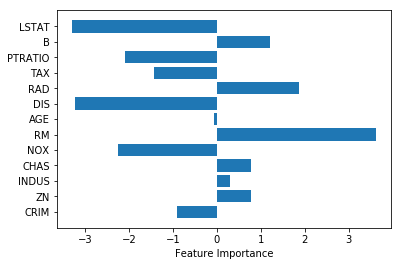

In [21]:
# Plot feature importance
plt.barh(list(X.columns), LR_model.coef_)
plt.xlabel("Feature Importance")

### <font color='green'>Output the mean-squared error, the absolute error and R2 (correlation squared) values</font>

Hint: You will find the following functions useful: mean_squared_error, mean_absolute_error, r2_score.



In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_predict = LR_model.predict(X_test)
mse = np.round(mean_squared_error(y_test, y_predict), 2)
mae = np.round(mean_absolute_error(y_test, y_predict), 2)
r_2 = np.round(r2_score(y_test, y_predict), 2)

print(f'Mean squared error is {mse}.\nMean absolute error is {mae}. \nR^2 value is {r_2}.')

Mean squared error is 28.97.
Mean absolute error is 3.9. 
R^2 value is 0.61.


### <font color='green'>Visualise your results by plottng the predicted median value of the house and the true value of the house. You can use either scatterplots or lineplots.</font>

TASK: Plot y_predict and y_true on 2 seperate graphs. 

HINT: See example below.

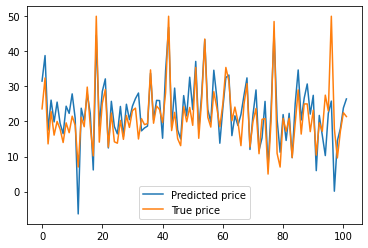

In [23]:
# we have to reset the index because when we split the data into train/test/val the index of the dataframe is jumbled

Y_TRUE = y_test.reset_index(drop=True) 


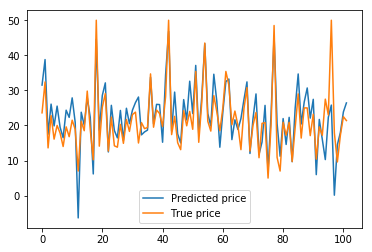

In [24]:
plt.plot(y_predict, label='Predicted price')
plt.plot(Y_TRUE, label='True price')
plt.legend()

# Polynomial Regression

### <font color='green'>Now implement a polynomial regression instead of a linear regression. Print out the mean squared error, mean absolute error and R^2 value of the test set.</font>

To implement a polynomial regression:

1. Define a polynomial regression: PolynomialFeatures(degree=<font color='green'>Choose order here</font>, include_bias=False).

2. Fit_transform your training and testing set using seperate poly regressions. Why are we fitting them seperately?

TASK 1: Implement a polynomial regression of order 2.

TASK 2: Print out the error metrics of the model applied to the test set.

In [25]:
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform the features using the polynomial fit 
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)

poly_model = LinearRegression().fit(poly_X_train, y_train)
y_predict = poly_model.predict(poly_X_test)

mse = np.round(mean_squared_error(y_test, y_predict), 2)
mae = np.round(mean_absolute_error(y_test, y_predict), 2)
r_2 = np.round(r2_score(y_test, y_predict), 2)
print(f'Mean squared error is {mse}.\nMean absolute error is {mae}. \nR^2 value is {r_2}. \n')

Mean squared error is 56.84.
Mean absolute error is 5.04. 
R^2 value is 0.22. 



### <font color='green'>Visualise your results by plottng the predicted median value of the house and the true value of the house. You can use either scatterplots or lineplots.</font>

TASK: Plot y_predict and y_true on 2 seperate graphs. 

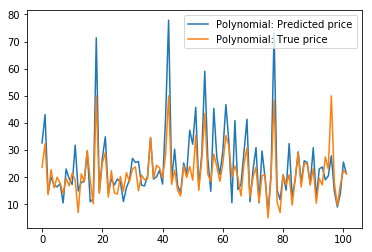

In [26]:
plt.plot(y_predict, label='Polynomial: Predicted price')
plt.plot(y_test.reset_index(drop=True), label='Polynomial: True price')
plt.legend()

### <font color='green'>Experiment with the degree of the polynomial (don’t go higher than 5!). What do you notice about the errors?</font>

In [16]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)

poly_model = LinearRegression().fit(poly_X_train, y_train)

y_predict = poly_model.predict(poly_X_test)
        
mse = np.round(mean_squared_error(y_test, y_predict), 2)
mae = np.round(mean_absolute_error(y_test, y_predict), 2)
r_2 = np.round(r2_score(y_test, y_predict), 2)
print(f'Mean squared error is {mse}.\nMean absolute error is {mae}. \nR^2 value is {r_2}. \n')

Mean squared error is 7912.69.
Mean absolute error is 19.02. 
R^2 value is -106.9. 



### <font color='green'>Visualise your results by plottng the predicted median value of the house and the true value of the house. You can use either scatterplots or lineplots.</font>

TASK: Plot y_predict and y_true on 2 seperate graphs. 

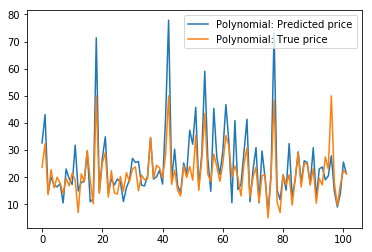

In [27]:
plt.plot(y_predict, label='Polynomial: Predicted price')
plt.plot(y_test.reset_index(drop=True), label='Polynomial: True price')
plt.legend()

### <font color='green'>Experiment to see how low you can get the mean squared error and absolute errors.</font>


In [28]:
poly = PolynomialFeatures(degree=4, include_bias=False)

poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)

poly_model = LinearRegression().fit(poly_X_train, y_train)

y_predict = poly_model.predict(poly_X_test)
        
mse = np.round(mean_squared_error(y_test, y_predict), 2)
mae = np.round(mean_absolute_error(y_test, y_predict), 2)
r_2 = np.round(r2_score(y_test, y_predict), 2)
print(f'Mean squared error is {mse}.\nMean absolute error is {mae}. \nR^2 value is {r_2}. \n')

Mean squared error is 2127.42.
Mean absolute error is 13.32. 
R^2 value is -28.01. 



### <font color='green'>Visualise your results by plottng the predicted median value of the house and the true value of the house. You can use either scatterplots or lineplots.</font>

TASK: Plot y_predict and y_true on 2 seperate graphs. 

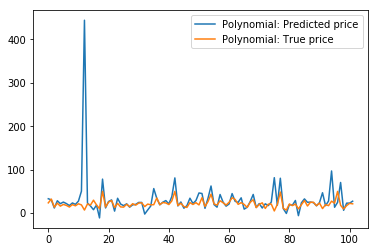

In [29]:
plt.plot(y_predict, label='Polynomial: Predicted price')
plt.plot(y_test.reset_index(drop=True), label='Polynomial: True price')
plt.legend()